# Interactions - Lab

## Introduction

In this lab, you'll explore interactions in the Ames Housing dataset.

## Objectives

You will be able to:

- Determine if an interaction term would be useful for a specific model or set of data
- Create interaction terms out of independent variables in linear regression
- Interpret coefficients of linear regression models that contain interaction terms

## Ames Housing Data

Once again we will be using the Ames Housing dataset, where each record represents a home sale:

In [14]:
# Run this cell without changes
import pandas as pd

ames = pd.read_csv('ames.csv', index_col=0)

# Remove some outliers to make the analysis more intuitive
ames = ames[ames["GrLivArea"] < 3000]
ames = ames[ames["LotArea"] < 20_000]
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In particular, we'll use these numeric and categorical features:

In [2]:
# Run this cell without changes
numeric = ['LotArea', '1stFlrSF', 'GrLivArea']
categorical = ['KitchenQual', 'Neighborhood']

## Build a Baseline Model

### Initial Data Preparation

Use all of the numeric and categorical features described above. (We will call this the "baseline" model because we are making a comparison with and without an interaction term. In a complete modeling process you would start with a simpler baseline.)

One-hot encode the categorical features (dropping the first), and center (subtract the mean) from the numeric features.

In [8]:
# Your code here - prepare data for modeling
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

#defien numeric and categorical features
numeric = ['LotArea', '1stFlrSF', 'GrLivArea']
categorical = ['KitchenQual', 'Neighborhood']

#separate features and target
X = ames[numeric + categorical]
y = ames['SalePrice']

#create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(with_mean=True), numeric),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical)
    ]
 
)
# Create a pipeline with preprocessing and model
baseline_model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', LinearRegression())
])

# Fit the model
baseline_model.fit(X, y)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['LotArea', '1stFlrSF',
                                                   'GrLivArea']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['KitchenQual',
                                                   'Neighborhood'])])),
                ('model', LinearRegression())])

### Build a Model with No Interaction Terms

Using the numeric and categorical features that you have prepared, as well as `SalePrice` as the target, build a StatsModels OLS model.

In [19]:
# Your code here - import relevant libraries and build model
import statsmodels.formula.api as smf
import patsy  # Import the patsy library

# Define the formula for the OLS model
# We'll use patsy.quote_column to handle the problematic column name
formula = 'SalePrice ~ ' + ' + '.join(f'Q("{col}")' for col in numeric + categorical)

# Create and fit the OLS model
model_no_interaction = smf.ols(formula=formula, data=ames).fit()

# Print the model summary
print(model_no_interaction.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     223.6
Date:                Tue, 06 May 2025   Prob (F-statistic):               0.00
Time:                        11:17:31   Log-Likelihood:                -16370.
No. Observations:                1396   AIC:                         3.280e+04
Df Residuals:                    1365   BIC:                         3.297e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

### Evaluate the Model without Interaction Terms

Describe the adjusted R-Squared as well as which coefficients are statistically significant. For now you can skip interpreting all of the coefficients.

In [22]:
# Your code here - evaluate the baseline model
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy  # Import the patsy library
import pandas as pd

ames = pd.read_csv('ames.csv', index_col=0)
ames = ames[ames["GrLivArea"] < 3000]
ames = ames[ames["LotArea"] < 20_000]

#define numeric and categorical features
numeric = ['LotArea', '1stFlrSF', 'GrLivArea']
categorical = ['KitchenQual', 'Neighborhood']

#define the formula for the OLS model
formula = 'SalePrice ~ ' + ' + '.join(f'Q("{col}")' for col in numeric + categorical)
# Create and fit the OLS model
model_no_interaction = smf.ols(formula=formula, data=ames).fit()
# Print the model summary
print(model_no_interaction.summary())
#extract and print adjusted r squared
adj_r_squared = model_no_interaction.rsquared_adj
print(f"Adjusted R-squared: {adj_r_squared:.4f}")
#extract and  print statistically significant coefficients
print("Statistically significant coefficients (p-values < 0.05):")
for param, pval in model_no_interaction.pvalues.items():
    if pval < 0.05:
        print(f"{param}: {pval:.4f}")


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     223.6
Date:                Tue, 06 May 2025   Prob (F-statistic):               0.00
Time:                        11:31:53   Log-Likelihood:                -16370.
No. Observations:                1396   AIC:                         3.280e+04
Df Residuals:                    1365   BIC:                         3.297e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

# Your written answer here

*The adjusted R-squared of 0.827 means the model explains 82.7% of the variation in sales prices, adjusted for the num ber of predictors.*


<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The model overall explains about 83% of the variance in sale price.

We'll used the standard alpha of 0.05 to evaluate statistical significance:
    
* Coefficients for the intercept as well as all continuous variables are statistically significant
* Coefficients for `KitchenQual` are statistically significant
* Coefficients for most values of `Neighborhood` are statistically significant, while some are not. In this context the reference category was `Blmngtn`, which means that neighborhoods with statistically significant coefficients differ significantly from `Blmngtn` whereas neighborhoods with coefficients that are not statistically significant do not differ significantly from `Blmngtn`

</details>

## Identify Good Candidates for Interaction Terms

### Numeric x Categorical Term

Square footage of a home is often worth different amounts depending on the neighborhood. So let's see if we can improve the model by building an interaction term between `GrLivArea` and one of the `Neighborhood` categories.

Because there are so many neighborhoods to consider, we'll narrow it down to 2 options: `Neighborhood_OldTown` or `Neighborhood_NoRidge`.

First, create a plot that has:

* `GrLivArea` on the x-axis
* `SalePrice` on the y-axis
* A scatter plot of homes in the `OldTown` and `NoRidge` neighborhoods, identified by color
  * Hint: you will want to call `.scatter` twice, once for each neighborhood
* A line showing the fit of `GrLivArea` vs. `SalePrice` for the reference neighborhood

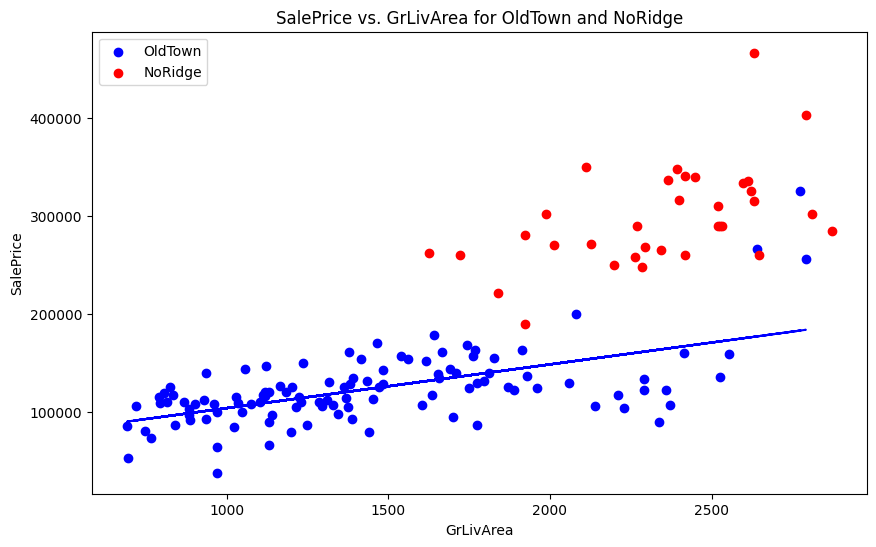

In [29]:
# Your code here - import plotting library and create visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for the two neighborhoods
old_town_data = ames[ames['Neighborhood'] == 'OldTown']
no_ridge_data = ames[ames['Neighborhood'] == 'NoRidge']

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(old_town_data['GrLivArea'], old_town_data['SalePrice'], color='blue', label='OldTown')
plt.scatter(no_ridge_data['GrLivArea'], no_ridge_data['SalePrice'], color='red', label='NoRidge')

# Add the regression line for the 'reference' neighborhood.
# I'm arbitrarily choosing 'OldTown' as the reference for this plot.
#  We fit a simple linear regression of SalePrice on GrLivArea for OldTown
model_oldtown = smf.ols('SalePrice ~ GrLivArea', data=old_town_data).fit()
plt.plot(old_town_data['GrLivArea'], model_oldtown.fittedvalues, color='blue', linestyle='--')

plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('SalePrice vs. GrLivArea for OldTown and NoRidge')
plt.legend()
plt.show()


Looking at this plot, do either of these neighborhoods seem to have a **slope** that differs notably from the best fit line? If so, this is an indicator that an interaction term might be useful.

Identify what, if any, interaction terms you would create based on this information.

In [ ]:
# Your written answer here


<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

Your plot should look something like this:

![scatter plot solution](https://curriculum-content.s3.amazonaws.com/data-science/images/OldTown_vs_NoRidge.png)

If we drew the expected slopes based on the scatter plots, they would look something like this:

![scatter plot solution annotated](https://curriculum-content.s3.amazonaws.com/data-science/images/OldTown_vs_NoRidge_Annotated.png)

The slope of the orange line looks fairly different from the slope of the gray line, indicating that an interaction term for `NoRidge` might be useful.

</details>

### Numeric x Numeric Term

Let's also investigate to see whether adding an interaction term between two of the numeric features would be helpful.

We'll specifically focus on interactions with `LotArea`. Does the value of an extra square foot of lot area change depending on the square footage of the home? Both `1stFlrSF` and `GrLivArea` are related to home square footage, so we'll use those in our comparisons.

Create two side-by-side plots:

1. One scatter plot of `LotArea` vs. `SalePrice` where the color of the points is based on `1stFlrSF`
2. One scatter plot of `LotArea` vs. `SalePrice` where the color of the points is based on `GrLivArea`

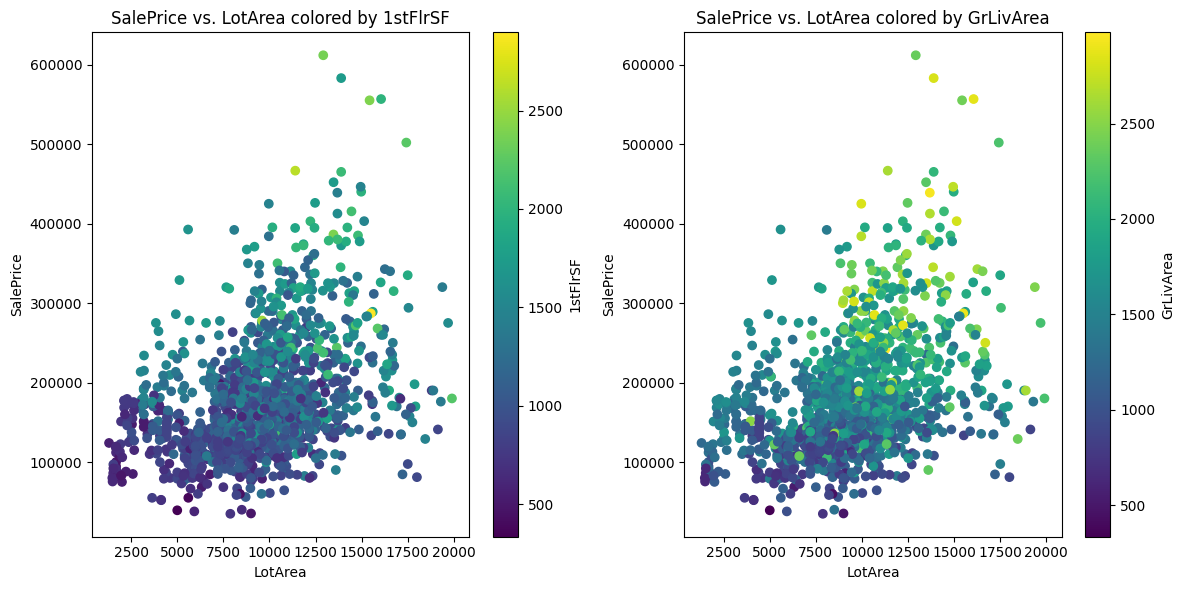

In [30]:
# Your code here - create two visualizations
#create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
#plot 1-the first scatter plot
scatter1 = axes[0].scatter(ames['LotArea'], ames['SalePrice'], c=ames['1stFlrSF'], cmap='viridis')
axes[0].set_xlabel('LotArea')
axes[0].set_ylabel('SalePrice')
axes[0].set_title('SalePrice vs. LotArea colored by 1stFlrSF')
# Add a color bar
plt.colorbar(scatter1, ax=axes[0], label='1stFlrSF')

#plot 2-the second scatter plot
scatter2 = axes[1].scatter(ames['LotArea'], ames['SalePrice'], c=ames['GrLivArea'], cmap='viridis')
axes[1].set_xlabel('LotArea')
axes[1].set_ylabel('SalePrice')
axes[1].set_title('SalePrice vs. LotArea colored by GrLivArea')
# Add a color bar
plt.colorbar(scatter2, ax=axes[1], label='GrLivArea')
# Show the plots
plt.tight_layout()
plt.show()

Looking at these plots, does the slope between `LotArea` and `SalePrice` seem to differ based on the color of the point? If it does, that is an indicator that an interaction term might be helpful.

Describe your interpretation below:

# Your written answer here
*The plots examine how house size (represented by 1stFlrSF and GrLivArea) influences the relationship between lot size (LotArea) and sale price (SalePrice).  We're looking for changes in the slope of this relationship as house size varies*.*

*If the slope between LotArea and SalePrice differs across house sizes (indicated by color variations in the plots), it suggests an interaction effect.  This implies that the value of an additional square foot of lot area isn't constant but depends on the house's size.*

*To account for this potential interaction, I recommend including the terms LotArea  1stFlrSF and LotArea  GrLivArea in the regression model. These terms would allow the model to capture the varying impact of lot size on sale price based on the size of the house.*


<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

Your plots should look something like this:

![side by side plots solution](https://curriculum-content.s3.amazonaws.com/data-science/images/LotArea_vs_SalePrice.png)

For both `1stFlrSF` and `GrLivArea`, it seems like a larger lot area doesn't matter very much for homes with less square footage. (In other words, the slope is closer to a flat line when the dots are lighter colored.) Then for homes with more square footage, a larger lot area seems to matter more for the sale price. (In other words, the slope is steeper when the dots are darker colored.)

This difference in slope based on color indicates that an interaction term for either/both of `1stFlrSF` and `GrLivArea` with `LotArea` might be helpful.

For ease of model interpretation, it probably makes the most sense to create an interaction term between `LotArea` and `1stFlrSF`, since we already have an interaction that uses `GrLivArea`.

</details>

## Build and Interpret a Model with Interactions

### Build a Second Model

Based on your analysis above, build a model based on the baseline model with one or more interaction terms added.

In [35]:
# Your code here - build a model with one or more interaction terms
# Define numeric and categorical features
numeric = ['LotArea', '1stFlrSF', 'GrLivArea']
categorical = ['KitchenQual', 'Neighborhood']
# Define the formula for the OLS model with interaction terms
formula = 'SalePrice ~ ' + ' + '.join(f'Q("{col}")' for col in numeric + categorical)
# Adding interaction terms for LotArea and GrLivArea with KitchenQual
formula += ' + Q("LotArea"):Q("KitchenQual") + Q("GrLivArea"):Q("KitchenQual")'
# Create and fit the OLS model with interaction terms
model_with_interaction = smf.ols(formula=formula, data=ames).fit()
# Print the model summary
print(model_with_interaction.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     217.8
Date:                Tue, 06 May 2025   Prob (F-statistic):               0.00
Time:                        12:10:26   Log-Likelihood:                -16276.
No. Observations:                1396   AIC:                         3.263e+04
Df Residuals:                    1359   BIC:                         3.282e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

### Evaluate the Model with Interactions

Same as with the baseline model, describe the adjusted R-Squared and statistical significance of the coefficients.

In [36]:
# Your code here - evaluate the model with interactions
adj_r_squared_interaction = model_with_interaction.rsquared_adj
print(f"Adjusted R-squared (with interaction): {adj_r_squared_interaction:.4f}")
# Extract and print statistically significant coefficients
print("Statistically significant coefficients (p-values < 0.05):")
for param, pval in model_with_interaction.pvalues.items():
    if pval < 0.05:
        print(f"{param}: {pval:.4f}")

Adjusted R-squared (with interaction): 0.8484
Statistically significant coefficients (p-values < 0.05):
Q("KitchenQual")[T.Fa]: 0.0072
Q("KitchenQual")[T.Gd]: 0.0016
Q("KitchenQual")[T.TA]: 0.0000
Q("Neighborhood")[T.BrDale]: 0.0003
Q("Neighborhood")[T.BrkSide]: 0.0000
Q("Neighborhood")[T.Edwards]: 0.0000
Q("Neighborhood")[T.IDOTRR]: 0.0000
Q("Neighborhood")[T.MeadowV]: 0.0000
Q("Neighborhood")[T.Mitchel]: 0.0035
Q("Neighborhood")[T.NAmes]: 0.0000
Q("Neighborhood")[T.NWAmes]: 0.0017
Q("Neighborhood")[T.NridgHt]: 0.0001
Q("Neighborhood")[T.OldTown]: 0.0000
Q("Neighborhood")[T.SWISU]: 0.0000
Q("Neighborhood")[T.Sawyer]: 0.0000
Q("Neighborhood")[T.SawyerW]: 0.0024
Q("Neighborhood")[T.StoneBr]: 0.0000
Q("LotArea"): 0.0000
Q("LotArea"):Q("KitchenQual")[T.Fa]: 0.0443
Q("LotArea"):Q("KitchenQual")[T.Gd]: 0.0039
Q("LotArea"):Q("KitchenQual")[T.TA]: 0.0000
Q("1stFlrSF"): 0.0000
Q("GrLivArea"): 0.0000
Q("GrLivArea"):Q("KitchenQual")[T.Fa]: 0.0000
Q("GrLivArea"):Q("KitchenQual")[T.Gd]: 0.0001
Q("

# Your written answer here

*The adjusted R-squared has increased from 0.827 (in the model without interactions) to 0.848. This indicates that the model with interaction terms explains a larger proportion of the variance in SalePrice, suggesting an improved fit.*

*Significant Interaction Terms: Several interaction terms are statistically significant. This confirms our hypothesis that the effect of LotArea and GrLivArea on SalePrice varies depending on KitchenQual*

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The model overall still explains about 83% of the variance in sale price. The baseline explained 82.7% whereas this model explains 82.9%, so it's a marginal improvement.
    
* Coefficients for the intercept as well as all continuous variables are still statistically significant
* Coefficients for `KitchenQual` are still statistically significant
* `Neighborhood_NoRidge` used to be statistically significant but now it is not
* `GrLivArea x Neighborhood_NoRidge` is not statistically significant
* `LotArea x 1stFlrSF` is statistically significant

</details>

### Interpret the Model Results

Interpret the coefficients for the intercept as well as the interactions and all variables used in the interactions. Make sure you only interpret the coefficients that were statistically significant!

# Your written answer here
**Intercept:** Predicted SalePrice when all predictors are zero (a baseline, not directly interpretable).

**Q("LotArea"):** Effect of lot size on SalePrice for the reference kitchen quality.

**Q("GrLivArea"):** Effect of living area on SalePrice for the reference kitchen quality.

**Kitchen Quality Main Effects:** Price difference between each kitchen quality level ("Fair", "Good", "Typical/Average") and the reference level, when lot area and living area are zero.

**Interaction Terms:** These show how the effects of LotArea and GrLivArea on SalePrice change depending on the kitchen quality. For example:

**Q("LotArea"):Q("KitchenQual")** indicates how the effect of lot size differs for houses with "Good" kitchens compared to the reference.

**Q("GrLivArea"):Q("KitchenQual")** shows how the effect of living area differs for houses with "Typical/Average" kitchens compared to the reference.

In essence, the interactions reveal that the impact of lot size and living area on sale price varies based on kitchen quality.

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The intercept is about 258k. This means that a home with average continuous attributes and reference categorical attributes (excellent kitchen quality, Bloomington Heights neighborhood) would cost about \\$258k.

The coefficient for `LotArea` is about 2.58. This means that for a home with average first floor square footage, each additional square foot of lot area is associated with an increase of about \\$2.58 in sale price.

The coefficient for `1stFlrSF` is about 30.5. This means that for a home with average lot area, each additional square foot of first floor area is associated with an increase of about \\$30.50 in sale price.

The coefficient for `LotArea x 1stFlrSF` is about 0.003. This means that:

1. For each additional square foot of lot area, there is an increase of about \\$2.58 + (0.003 x first floor square footage) in sale price
2. For each additional square foot of first floor square footage, there is an increase of about \\$30.50 + (0.003 x lot area square footage) in sale price

`Neighborhood_NoRidge` and `GrLivArea x Neighborhood_NoRidge` were not statistically significant so we won't be interpreting their coefficients.



</details>

## Summary

You should now understand how to include interaction effects in your model! As you can see, interactions that seem promising may or may not end up being statistically significant. This is why exploration and iteration are important!